<a href="https://colab.research.google.com/github/sucansa/DSProjects/blob/Local-copy/Classification_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
import pycaret

In [ ]:
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [ ]:
print(df3);print(X_train);print(y_train)

           UserID Sex  PreviousDefault  ...              City    Purpose  DateOfBirth
0     218-84-8180   F                0  ...        Port Keith   Vacation   1964-04-07
1     395-49-9764   M                0  ...        Lake Debra     NewCar   1978-06-02
2     892-81-4890   F                0  ...  North Judithbury     NewCar   1972-03-18
3     081-11-7963   F                0  ...         Lake Chad      Other   1985-02-26
4     347-03-9639   M                0  ...  North Judithbury   Vacation   1983-08-08
...           ...  ..              ...  ...               ...        ...          ...
5995  290-91-5587   F                0  ...    East Jessetown     Repair   1968-08-25
5996  137-27-2025   M                0  ...          Lisatown     NewCar   1969-08-15
5997  061-50-0051   M                0  ...    New Roberttown  Education   1977-04-12
5998  239-62-7143   M                0  ...  North Judithbury     NewCar   1966-06-12
5999  367-72-7571   F                0  ...  North Jud

In [ ]:
#Check Null values
X_train.isna().sum()

UserID               0
Sex                  0
PreviousDefault      0
FirstName            0
LastName             0
NumberPets           0
PreviousAccounts     0
ResidenceDuration    0
Street               0
LicensePlate         0
Amount               0
Married              0
Duration             0
City                 0
Purpose              0
DateOfBirth          0
dtype: int64

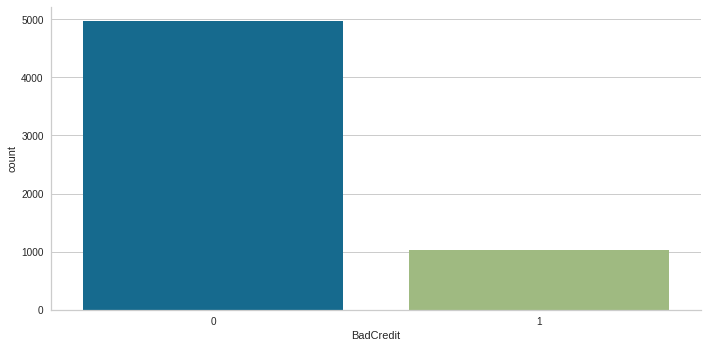

In [ ]:
#Traget variable plot
import seaborn as sns
sns.factorplot('BadCredit', data=df3, aspect=2, kind='count');

In [ ]:
from datetime import datetime
X_train.DateOfBirth = pd.to_datetime(X_train.DateOfBirth, format='%Y-%m-%d')
X_train['year']  = X_train.DateOfBirth.dt.year
X_train['month'] = X_train.DateOfBirth.dt.month
X_train['day'] = X_train.DateOfBirth.dt.day

def Age(data):
  now = datetime.now().year
  data['Age'] = now- data['year']
  data['Age']=data['Age'].replace([2021],0)
  return data

X_train= Age(X_train)
X_train['DateOfBirth']=X_train['DateOfBirth'].apply(lambda x: x.toordinal())

X_train.dtypes

UserID               object
Sex                  object
PreviousDefault       int64
FirstName            object
LastName             object
NumberPets            int64
PreviousAccounts      int64
ResidenceDuration     int64
Street               object
LicensePlate         object
Amount                int64
Married               int64
Duration              int64
City                 object
Purpose              object
DateOfBirth           int64
year                  int64
month                 int64
day                   int64
Age                   int64
dtype: object

In [ ]:

X_train = X_train.drop(labels=['UserID','DateOfBirth', 'Street', 'LicensePlate','FirstName','LastName'], axis=1)
X_train

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,year,month,day,Age
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household,1970,4,22,51
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household,1964,6,19,57
1756,F,0,2,0,3,2470,0,24,East Jill,NewCar,1975,2,17,46
2346,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar,1977,2,16,44
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation,1976,7,27,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,F,0,0,1,1,3607,1,24,Robinsonshire,NewCar,1973,1,4,48
5191,F,0,2,1,0,3186,0,30,North Judithbury,NewCar,1973,12,25,48
5226,F,0,2,1,3,2387,1,36,Lake Roberto,Business,1969,2,25,52
5390,F,0,1,1,3,3620,0,12,Lake Debra,Other,1967,1,9,54


In [ ]:
feat = [x for x in X_train.columns]
for col in feat:
  print(X_train.groupby([col]).size())
  

Sex
F    3338
M    1462
dtype: int64
PreviousDefault
0    4703
1      97
dtype: int64
NumberPets
0    1552
1    1596
2    1652
dtype: int64
PreviousAccounts
0    1741
1    1822
2     837
3     301
4      76
5      16
6       7
dtype: int64
ResidenceDuration
0     641
1    1317
2    1287
3     886
4     441
5     155
6      49
7      19
8       4
9       1
dtype: int64
Amount
2158    1
2262    1
2266    1
2270    1
2319    1
       ..
4821    1
4825    1
4935    1
4964    1
4982    1
Length: 1641, dtype: int64
Married
0    2374
1    2426
dtype: int64
Duration
6      420
12     507
18     710
24     977
30    1165
36    1021
dtype: int64
City
Cassandraton         130
East Jessetown       341
East Jill            652
Ericmouth            155
Herrerafurt           96
Jacquelineland        56
Lake Chad             97
Lake Debra           278
Lake Roberto         164
Lisatown             169
New Jessica           67
New Kellystad         99
New Roberttown       467
North Judithbury    1319
N

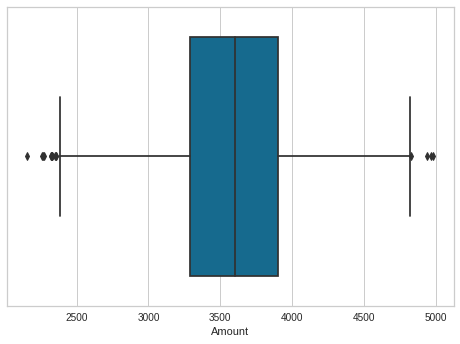

In [ ]:
sns.boxplot(X_train.Amount)

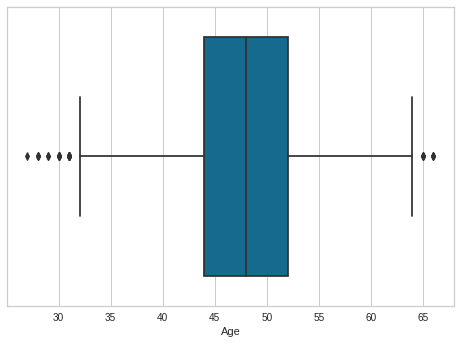

In [ ]:
sns.boxplot(X_train.Age)

In [ ]:

for x in X_train.columns:
  if X_train[x].dtype == 'object':
    X_train[x]= X_train[x].astype('category')

X_train.dtypes

Sex                  category
PreviousDefault         int64
NumberPets              int64
PreviousAccounts        int64
ResidenceDuration       int64
Amount                  int64
Married                 int64
Duration                int64
City                 category
Purpose              category
year                    int64
month                   int64
day                     int64
Age                     int64
dtype: object

In [ ]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(X_train.Amount)


X_train = X_train.loc[(X_train.Amount > lower) & (X_train.Amount < upper)]




In [ ]:
lower1, upper1 = remove_outlier(X_train.Age)
X_train = X_train.loc[(X_train.Age > lower1) & (X_train.Age < upper1)]


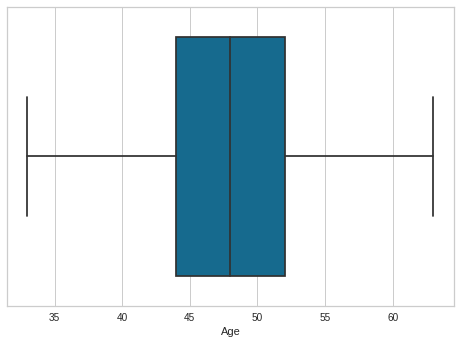

In [ ]:
sns.boxplot(X_train.Age)

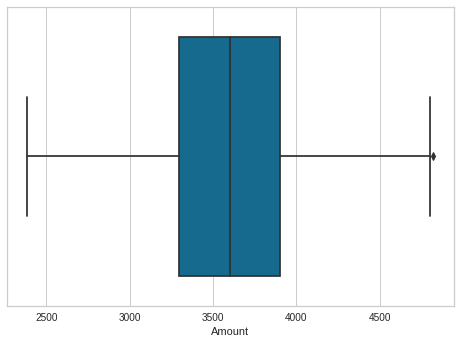

In [ ]:
sns.boxplot(X_train.Amount)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
Sex_le = le.fit_transform(X_train.Sex)
Purpose_le = le.fit_transform(X_train.Purpose)

X_train.loc[:, 'Sex'] = le.fit_transform(X_train.loc[:, 'Sex'])
X_train.loc[:, 'Purpose'] = le.fit_transform(X_train.loc[:, 'Purpose'])
X_train.loc[:, 'City'] = le.fit_transform(X_train.loc[:, 'City'])

In [ ]:
#y_train = LabelEncoder().fit_transform(y_train)
X_train

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,year,month,day,Age
3897,1,0,2,0,2,3329,0,12,12,2,1970,4,22,51
5628,0,0,0,2,2,2996,0,36,3,2,1964,6,19,57
1756,0,0,2,0,3,2470,0,24,2,3,1975,2,17,46
2346,0,0,2,1,2,3745,0,30,7,6,1977,2,16,44
2996,1,0,0,1,3,3549,0,36,13,7,1976,7,27,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,0,1,1,3607,1,24,18,3,1973,1,4,48
5191,0,0,2,1,0,3186,0,30,13,3,1973,12,25,48
5226,0,0,2,1,3,2387,1,36,8,0,1969,2,25,52
5390,0,0,1,1,3,3620,0,12,7,4,1967,1,9,54


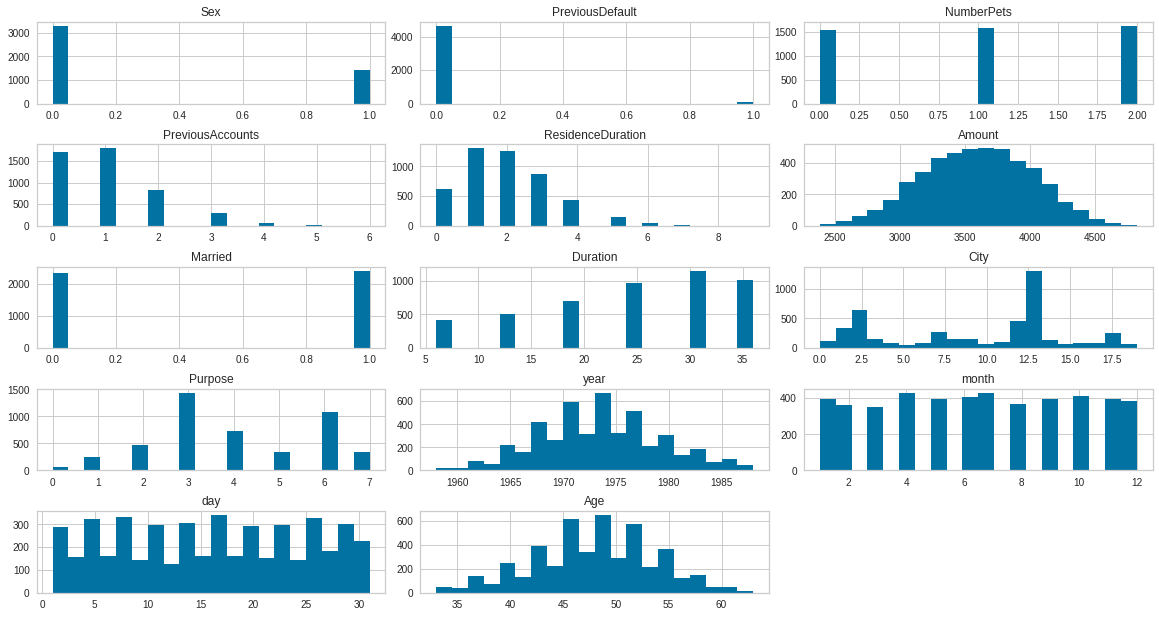

In [ ]:
import matplotlib.pyplot as plt
# Histogram of each feature
import itertools

col = X_train.columns[:14]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    X_train[i].hist(bins = 20)
    plt.title(i)
plt.show()

In [ ]:
X_train['age_binned'] = pd.qcut(X_train.Age, q=[0, .25, .50, .75, 1])
X_train['amt_binned'] = pd.qcut(X_train.Amount, q=[0, .25, .50, .75, 1])
X_train['year_binned'] = pd.qcut(X_train.year, q=[0, .25, .50, .75, 1])
X_train['day_binned'] = pd.qcut(X_train.day, q=[0, .25, .50, .75, 1])
X_train['month_binned'] = pd.qcut(X_train.month, q=[0, .25, .50, .75, 1])

X_train.drop(columns=['Age', 'Amount', 'year','day','month'], inplace=True)


In [ ]:
X_train['Age']= le.fit_transform(X_train['age_binned'])
X_train['amount']= le.fit_transform(X_train['amt_binned'])
X_train['year']= le.fit_transform(X_train['year_binned'])
X_train['day']= le.fit_transform(X_train['day_binned'])
X_train['month']= le.fit_transform(X_train['month_binned'])

In [ ]:
X_train.drop(columns=['age_binned','amt_binned','year_binned','day_binned','month_binned'],inplace=True)
X_train

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Married,Duration,City,Purpose,Age,amount,year,day,month
3897,1,0,2,0,2,0,12,12,2,2,1,1,2,0
5628,0,0,0,2,2,0,36,3,2,3,0,0,2,1
1756,0,0,2,0,3,0,24,2,3,1,0,2,2,0
2346,0,0,2,1,2,0,30,7,6,0,2,2,1,0
2996,1,0,0,1,3,0,36,13,7,1,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,0,1,1,1,24,18,3,1,2,1,0,0
5191,0,0,2,1,0,0,30,13,3,1,0,1,3,3
5226,0,0,2,1,3,1,36,8,0,2,0,0,3,0
5390,0,0,1,1,3,0,12,7,4,3,2,0,1,0


In [ ]:
temp = pd.concat([X_train, y_train], axis=1)
temp.columns[-1]

'BadCredit'

In [ ]:
temp.dtypes

Sex                  category
PreviousDefault       float64
NumberPets            float64
PreviousAccounts      float64
ResidenceDuration     float64
Married               float64
Duration              float64
City                 category
Purpose              category
age_binned           category
amt_binned           category
year_binned          category
day_binned           category
month_binned         category
BadCredit               int64
dtype: object

In [ ]:
from pycaret.regression import *
# setup the dataset
grid = setup(data=temp, target=temp.columns[-1], numeric_features = ['PreviousDefault','NumberPets','PreviousAccounts','ResidenceDuration','Duration'],session_id=123)
#grid = setup(data=temp, target=temp.columns[-1], numeric_features = ['NumberPets','PreviousAccounts','ResidenceDuration','Married','Duration','Amount'])


,Description,Value
0,session_id,123
1,Target,BadCredit
2,Original Data,"(4800, 15)"
3,Missing Values,True
4,Numeric Features,5
5,Categorical Features,9
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3359, 57)"


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
add_metric('Accuracy','Accuracy', accuracy_score)
add_metric('Precision','Precision', precision_score)
add_metric('F1 score','F1', f1_score)

Name                                                    F1
Display Name                                            F1
Score Function       <function f1_score at 0x7f15ea07bb00>
Scorer                               make_scorer(f1_score)
Target                                                pred
Args                                                    {}
Greater is Better                                     True
Custom                                                True
Name: F1_score, dtype: object

In [ ]:
best_model = compare_models()



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,Accuracy,Precision,F1,TT (Sec)
gbr,Gradient Boosting Regressor,0.1742,8.340000e-02,0.2886,4.037000e-01,0.2025,0.4846,0.0,0.0,0.0,0.339
br,Bayesian Ridge,0.2186,9.150000e-02,0.3023,3.468000e-01,0.2163,0.5366,0.0,0.0,0.0,0.030
ridge,Ridge Regression,0.2197,9.170000e-02,0.3026,3.452000e-01,0.2170,0.5294,0.0,0.0,0.0,0.020
lr,Linear Regression,0.2198,9.170000e-02,0.3026,3.450000e-01,0.2171,0.5290,0.0,0.0,0.0,0.321
rf,Random Forest Regressor,0.1695,9.210000e-02,0.3030,3.438000e-01,0.2142,0.4759,0.0,0.0,0.0,1.037
lightgbm,Light Gradient Boosting Machine,0.1792,9.260000e-02,0.3037,3.401000e-01,0.2131,0.4834,0.0,0.0,0.0,0.127
omp,Orthogonal Matching Pursuit,0.2175,9.510000e-02,0.3082,3.212000e-01,0.2197,0.5562,0.0,0.0,0.0,0.019
ada,AdaBoost Regressor,0.2258,9.790000e-02,0.3127,3.000000e-01,0.2258,0.5360,0.0,0.0,0.0,0.072
et,Extra Trees Regressor,0.1629,1.169000e-01,0.3414,1.667000e-01,0.2387,0.4709,0.0,0.0,0.0,1.087
knn,K Neighbors Regressor,0.2064,1.177000e-01,0.3427,1.616000e-01,0.2439,0.5818,0.0,0.0,0.0,0.078


In [ ]:
# report the best model
print(best_model)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
gb = create_model('gbr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE,Accuracy,Precision,F1
0,0.1787,0.0847,0.2911,0.3984,0.2055,0.4783,0.0,0.0,0.0
1,0.1950,0.1000,0.3162,0.3938,0.2179,0.5060,0.0,0.0,0.0
2,0.1644,0.0777,0.2787,0.4407,0.1961,0.4642,0.0,0.0,0.0
3,0.1769,0.0851,0.2918,0.3593,0.2089,0.4785,0.0,0.0,0.0
4,0.1654,0.0775,0.2784,0.3777,0.1974,0.5021,0.0,0.0,0.0
5,0.1782,0.0861,0.2935,0.3799,0.2080,0.4701,0.0,0.0,0.0
6,0.1676,0.0782,0.2797,0.4986,0.1918,0.4921,0.0,0.0,0.0
7,0.1570,0.0710,0.2665,0.4569,0.1855,0.4605,0.0,0.0,0.0
8,0.1802,0.0872,0.2953,0.2622,0.2116,0.5109,0.0,0.0,0.0
9,0.1781,0.0868,0.2947,0.4690,0.2025,0.4833,0.0,0.0,0.0


In [ ]:
tuned = tune_model(gb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,Accuracy,Precision,F1
0,0.1857,0.0865,0.2941,0.3858,0.2088,0.4770,0.0,0.0,0.0
1,0.2035,0.1046,0.3233,0.3661,0.2228,0.5117,0.0,0.0,0.0
2,0.1745,0.0793,0.2816,0.4292,0.1995,0.4560,0.0,0.0,0.0
3,0.1737,0.0880,0.2967,0.3376,0.2122,0.4755,0.0,0.0,0.0
4,0.1744,0.0784,0.2800,0.3705,0.1982,0.5233,0.0,0.0,0.0
5,0.1797,0.0884,0.2974,0.3632,0.2113,0.4558,0.0,0.0,0.0
6,0.1701,0.0788,0.2806,0.4953,0.1912,0.5025,0.0,0.0,0.0
7,0.1610,0.0706,0.2656,0.4607,0.1864,0.4513,0.0,0.0,0.0
8,0.1834,0.0920,0.3033,0.2217,0.2170,0.5261,0.0,0.0,0.0
9,0.1914,0.0964,0.3105,0.4104,0.2137,0.5094,0.0,0.0,0.0


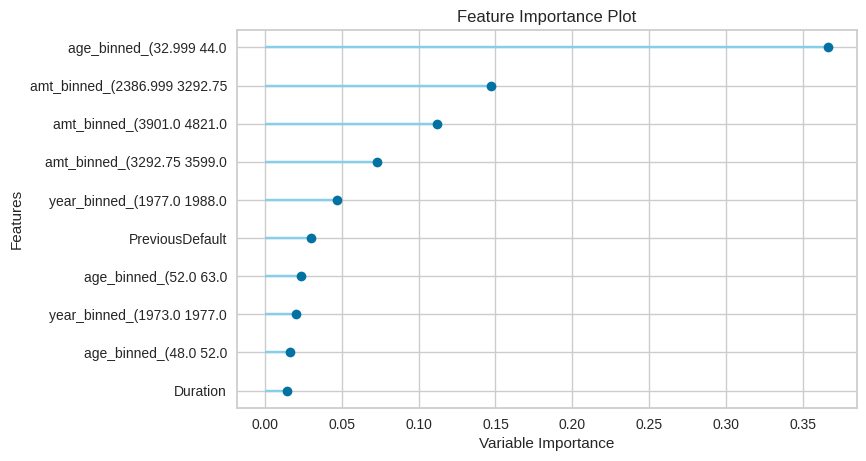

In [ ]:
plot_model(tuned, plot='feature')

In [ ]:
plot_model(tuned, plot = 'confusion_matrix')

ValueError: ignored

In [ ]:
ensembled_gbm = ensemble_model(gb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,Accuracy,Precision,F1
0,0.1806,0.0845,0.2906,0.4005,0.2052,0.4837,0.0,0.0,0.0
1,0.1985,0.1004,0.3168,0.3914,0.2178,0.5122,0.0,0.0,0.0
2,0.1678,0.0777,0.2788,0.4403,0.1960,0.4774,0.0,0.0,0.0
3,0.1782,0.0858,0.2930,0.3540,0.2098,0.4870,0.0,0.0,0.0
4,0.1667,0.0781,0.2794,0.3732,0.1979,0.5130,0.0,0.0,0.0
5,0.1779,0.0859,0.2930,0.3818,0.2069,0.4808,0.0,0.0,0.0
6,0.1691,0.0780,0.2793,0.5000,0.1912,0.4977,0.0,0.0,0.0
7,0.1588,0.0705,0.2655,0.4611,0.1855,0.4644,0.0,0.0,0.0
8,0.1792,0.0867,0.2945,0.2662,0.2110,0.5220,0.0,0.0,0.0
9,0.1816,0.0874,0.2957,0.4654,0.2028,0.4928,0.0,0.0,0.0


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

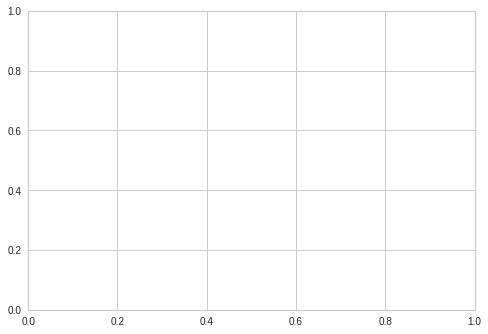

In [ ]:
evaluate_model(ensembled_gbm)

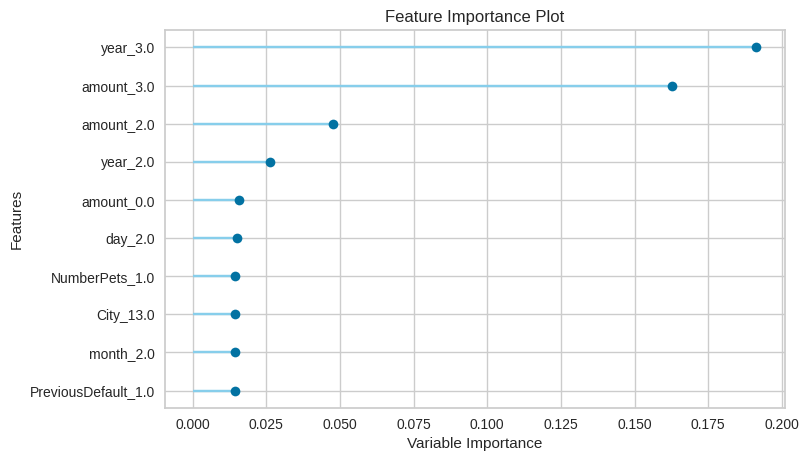

In [ ]:
plot_model(tuned, plot = 'feature')

In [ ]:
# calculate f2 score
def f2(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=2)

In [ ]:
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# define the model evaluation the metric
	metric = make_scorer(f2)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return scores

In [ ]:
# define the reference model
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy='constant', constant=1)

In [ ]:
# evaluate the model
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
scores = evaluate_model(X_train, y_train, model)
# summarize performance
print('Mean F2:', sum(scores)/len(scores))

In [ ]:
# define models to test
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
def get_models():
	models, names = list(), list()
	# LR
	models.append(LogisticRegression(solver='liblinear'))
	names.append('LR')
	# LDA
	models.append(LinearDiscriminantAnalysis())
	names.append('LDA')
	# NB
	models.append(GaussianNB())
	names.append('NB')
	# GPC
	models.append(GaussianProcessClassifier())
	names.append('GPC')
	# SVM
	models.append(SVC(gamma='scale'))
	names.append('SVM')
 	# RFM
	models.append(RandomForestClassifier())
	names.append('RFM')

  
	return models, names

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=15)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [ ]:
pca = PCA(n_components=10)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)



In [ ]:
from sklearn.compose import ColumnTransformer
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	
	# wrap the model i a pipeline
	model_run = models[i]
	# evaluate the model and store results
	scores = evaluate_model(X_train_scaled_pca, y_train, model_run)
	results.append(scores)
	# summarize and store
	print('Mean F2:', sum(scores)/len(scores))


In [ ]:
scores1 = evaluate_model(X_train_scaled_pca, y_train, model)
scores1


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_train_new=selector.fit_transform(X_train_scaled_pca)
scores2 = evaluate_model(X_train_new, y_train, model)
# summarize performance
print('Mean F2: %.3f (%.3f)', sum(scores2)/len(scores2))


In [ ]:
!pip install imbalanced-learn